## Image Classification Using and SVC and kNN Classifier

In [1]:
# Importing the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Libraries required for image processing.

import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image

In [4]:
# Processing the images.

classes = ['cats', 'dogs']
image_path = 'C:/Users/LENOVO/Dropbox/PC/Desktop/Machine_Learning_Project/dataset'

def image_processing(classes, specific_set):
    im_path = os.path.join(image_path, specific_set)
    image_array = []
    target = []
    Final_im = []
    size = (64, 64, 3)
    
    for i in classes:
        im_path_1 = os.path.join(im_path, i)
        
        for j in os.listdir(im_path_1):
            im_path_final = os.path.join(im_path_1, j)
            image = imread(im_path_final)
            image_array.append(image)
        
            image_res = resize(image, size)
        
            flat_im = image_res.flatten()
        
            target.append(classes.index(i))
            Final_im.append(flat_im)
        
    return Final_im, target
        
    

In [5]:
X_train, y_train = image_processing(classes=classes, specific_set='training_set')


In [6]:
X_test, y_test = image_processing(classes=classes, specific_set='test_set')

In [7]:
len(X_train), len(y_train), len(X_test), len(y_test)

(8000, 8000, 2000, 2000)

In [8]:
# Fitting the kNN model.

model = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [9]:
model.score(X_test, y_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.593

In [10]:
# The kNN model gives low accuracy.
# We try support vector machine classifier.

model1 = SVC()
model1.fit(X_train, y_train)

SVC()

In [11]:
model1.score(X_test, y_test)

0.676

In [12]:
# Hyperparameter tuning using RandomizedSeachCV.

sv_grid = {"C": np.arange(1, 10, 2),
           "kernel": ['poly', 'sigmoid'],
           "max_iter": [1000, 10000, 20000]}
sv = RandomizedSearchCV(SVC(), param_distributions=sv_grid, verbose=True, cv=5)
sv.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([1, 3, 5, 7, 9]),
                                        'kernel': ['poly', 'sigmoid'],
                                        'max_iter': [1000, 10000, 20000]},
                   verbose=True)

In [13]:
sv.score(X_test, y_test)

0.6605

In [14]:
sv.best_params_

{'max_iter': 20000, 'kernel': 'poly', 'C': 7}

In [15]:
# Model with default parameters give better results

In [18]:
im = 'C:/Users/LENOVO/Dropbox/PC/Desktop/Machine_Learning_Project/dataset/single_prediction/cat_or_dog_1.jpg'
im1 = imread(im)
size = (64, 64, 3)
im1_res = resize(im1, size)
fin_im = im1_res.flatten()

In [35]:
model1.predict(fin_im.reshape(1, -1))

array([1])

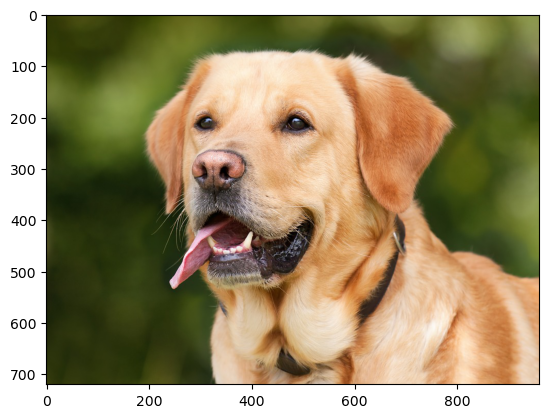

In [43]:
# The model has predicted that the picture is a dog.
# We visualize the image.
plt.imshow(im1)

In [44]:
# The model has predicted the photo properly. 
# But the accuracy score is still low and might get better results with neural networks.